In [36]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import numpy as np
import zipfile as zf
import re

In [37]:
def extract(path, filename):
    archive = zf.ZipFile(path)
    file = archive.open(filename)
    return file

In [38]:
def null_filter(list): 
    count = list.count(np.nan) 
    for i in range(count): 
        list.remove(np.nan) 
    return list 

In [39]:
def find_languages(list):
    languages = []
    responses = null_filter(list)
    for response in responses:
        temp_languages = re.findall("[^;]+", response)
        for language in temp_languages:
            languages.append(language)
    return languages

In [40]:
dicts = []
for i in range(2019, 2024):
    df = pd.read_csv(extract('../data/StackOverflowSurvey' + str(i) + '.zip', 'survey.csv'))
    languages = []
    if i in range(2019, 2021):
        df = df['LanguageWorkedWith']
        for language in find_languages(df.tolist()):
            languages.append(language)
            
        language_counts = list(set(languages))
        language_counts = dict.fromkeys(languages)
        for key in language_counts:
            language_counts[key] = 0
            
        for key in language_counts:    
            for language in languages:
                if language == key:
                    language_counts[key] += 1
                    
        dicts.append(language_counts)
    else:
        df = df['LanguageHaveWorkedWith']
        for language in find_languages(df.tolist()):
            languages.append(language)
            
        language_counts = list(set(languages))
        language_counts = dict.fromkeys(languages)
        for key in language_counts:
            language_counts[key] = 0
            
        for key in language_counts:    
            for language in languages:
                if language == key:
                    language_counts[key] += 1
                    
        dicts.append(language_counts)

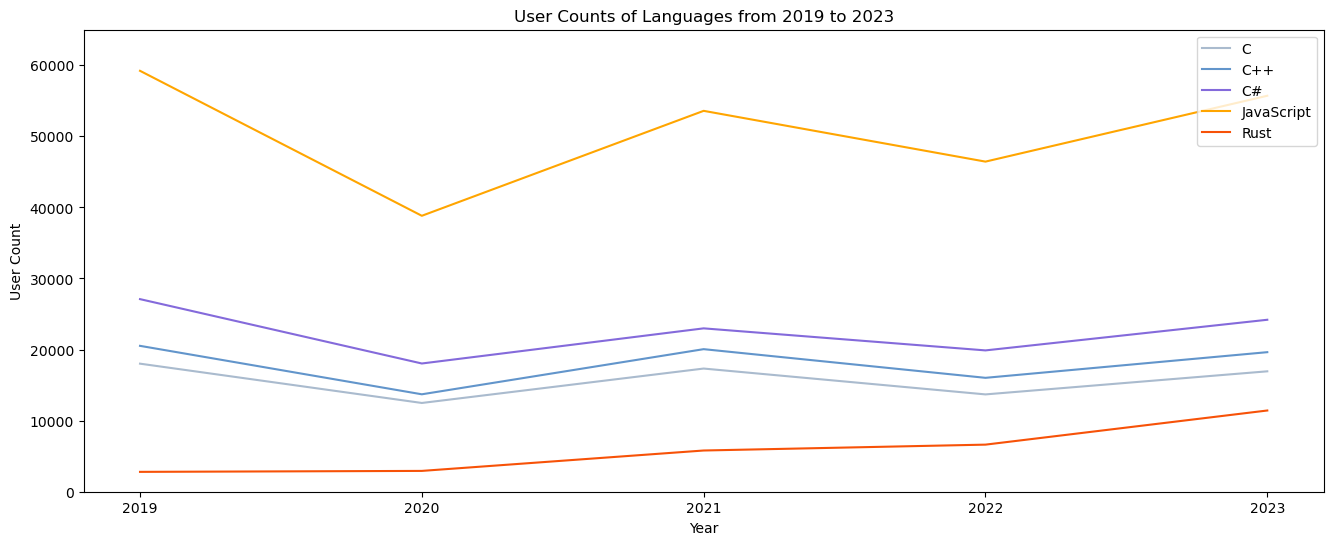

In [41]:
years = range(2019,2024)

c_sharp_users = []
for i in range(5):
    c_sharp_users.append(dicts[i]['C#'])
c_plus_plus_users = []
for i in range(5):
    c_plus_plus_users.append(dicts[i]['C++'])
c_users = []
for i in range(5):
    c_users.append(dicts[i]['C'])
javascript_users = []
for i in range(5):
    javascript_users.append(dicts[i]['JavaScript'])
rust_users = []
for i in range(5):
    rust_users.append(dicts[i]['Rust'])
    
fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot()

ax.plot(years, c_users, label='C', color='#aabbce')
ax.plot(years, c_plus_plus_users, label='C++', color='#6295cb')
ax.plot(years, c_sharp_users, label='C#', color='#846adb')
ax.plot(years, javascript_users, label='JavaScript', color='orange')
ax.plot(years, rust_users, label='Rust', color='#f75208')

ax.set_title('User Counts of Languages from 2019 to 2023')
ax.set_xlabel('Year')
ax.set_ylabel('User Count')
ax.set_ylim(0, 65000)
ax.set_xticks(years)

ax.legend(loc=1)
plt.show()

In [42]:
dicts = []
for i in range(2019, 2024):
    df = pd.read_csv(extract('../data/StackOverflowSurvey' + str(i) + '.zip', 'survey.csv'))
    languages = []
    if i in range(2019, 2021):
        df = df['LanguageDesireNextYear']
        for language in find_languages(df.tolist()):
            languages.append(language)
            
        language_counts = list(set(languages))
        language_counts = dict.fromkeys(languages)
        for key in language_counts:
            language_counts[key] = 0
            
        for key in language_counts:    
            for language in languages:
                if language == key:
                    language_counts[key] += 1
                    
        dicts.append(language_counts)
    else:
        df = df['LanguageWantToWorkWith']
        for language in find_languages(df.tolist()):
            languages.append(language)
            
        language_counts = list(set(languages))
        language_counts = dict.fromkeys(languages)
        for key in language_counts:
            language_counts[key] = 0
            
        for key in language_counts:    
            for language in languages:
                if language == key:
                    language_counts[key] += 1
                    
        dicts.append(language_counts)

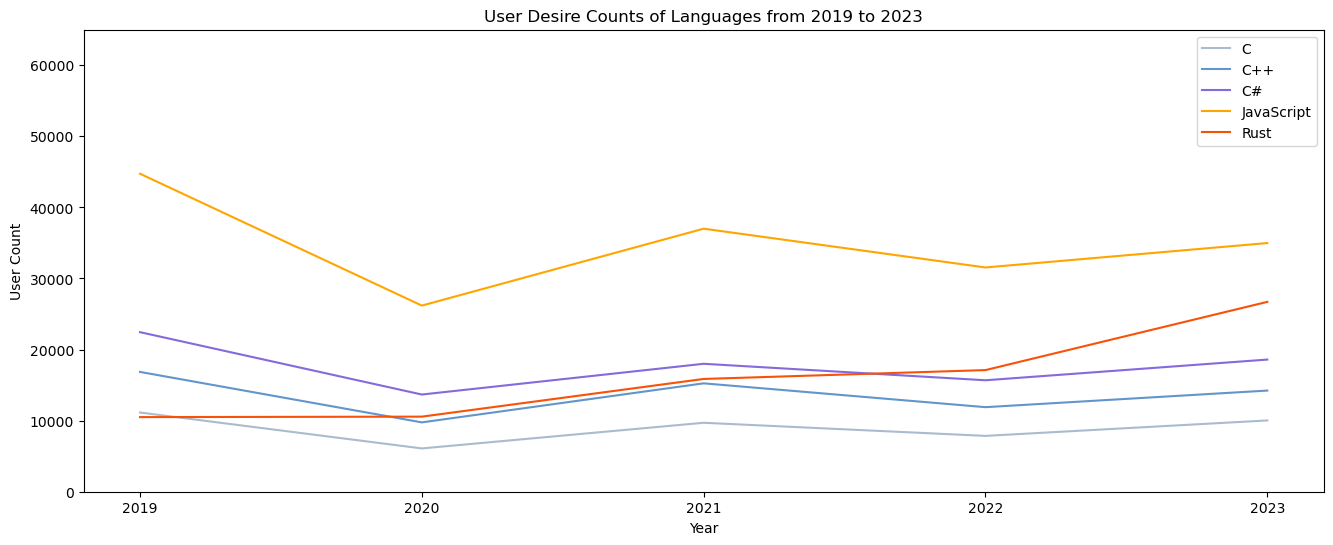

In [43]:
years = range(2019,2024)

desired_c_sharp_users = []
for i in range(5):
    desired_c_sharp_users.append(dicts[i]['C#'])
desired_c_plus_plus_users = []
for i in range(5):
    desired_c_plus_plus_users.append(dicts[i]['C++'])
desired_c_users = []
for i in range(5):
    desired_c_users.append(dicts[i]['C'])
desired_javascript_users = []
for i in range(5):
    desired_javascript_users.append(dicts[i]['JavaScript'])
desired_rust_users = []
for i in range(5):
    desired_rust_users.append(dicts[i]['Rust'])
    
fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot()

ax.plot(years, desired_c_users, label='C', color='#aabbce')
ax.plot(years, desired_c_plus_plus_users, label='C++', color='#6295cb')
ax.plot(years, desired_c_sharp_users, label='C#', color='#846adb')
ax.plot(years, desired_javascript_users, label='JavaScript', color='orange')
ax.plot(years, desired_rust_users, label='Rust', color='#f75208')

ax.set_title('User Desire Counts of Languages from 2019 to 2023')
ax.set_xlabel('Year')
ax.set_ylabel('User Count')
ax.set_ylim(0, 65000)
ax.set_xticks(years)

ax.legend(loc=1)
plt.show()

In [44]:
# pd.set_option('display.max_columns', None)
# df = pd.read_csv(extract('../data/StackOverflowSurvey2019.zip', 'survey.csv'))
# display(df)

In [45]:
def find_average_us_salary(language):
    pays = []
    for i in range(2019, 2024):
        if i in range(2019, 2021):
            df = pd.read_csv(extract('../data/StackOverflowSurvey' + str(i) + '.zip', 'survey.csv'))
            df['LanguageWorkedWith'] = df['LanguageWorkedWith'].fillna('')
            df['CompTotal'] = df['CompTotal'].fillna(0)
            df['CurrencySymbol'] = df['CurrencySymbol'].fillna('')
            df = df[df['LanguageWorkedWith'].str.contains(language)]
            df = df[df['CurrencySymbol'].str.contains('USD')]
            df = df[df['Country'].str.contains('United States')]
            for pay in df['CompTotal'].tolist():
                pays.append(pay)
        else:
            df = pd.read_csv(extract('../data/StackOverflowSurvey' + str(i) + '.zip', 'survey.csv'))
            df['LanguageHaveWorkedWith'] = df['LanguageHaveWorkedWith'].fillna('')
            df['CompTotal'] = df['CompTotal'].fillna(0)
            df['Currency'] = df['Currency'].fillna('')
            df = df[df['LanguageHaveWorkedWith'].str.contains(language)]
            df = df[df['Currency'].str.contains('USD')]
            df = df[df['Country'].str.contains('United States')]
            for pay in df['CompTotal'].tolist():
                pays.append(pay)
    count = pays.count(0)
    for i in range(count):
        pays.remove(0)
    for pay in pays:
        if pay > 1000000:
            pays.remove(pay)
    return np.average(pays)

In [ ]:
languages = ['JavaScript', 'Rust', 'C', 'C++', 'C#']
avg_salaries = []
colors = ['orange', '#f75208', '#aabbce', '#6295cb', '#846adb']
for language in languages:
    avg_salaries.append(find_average_us_salary(language))

In [ ]:
fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot()
ax.bar(languages, avg_salaries, color=colors)
ax.set_xlabel('Languages')
ax.set_ylabel('USD Salary')
ax.set_title('Average US Salary per Language')
ax.yaxis.set_major_locator(ticker.MultipleLocator(20000))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(10000))
plt.show()